In [32]:
import sys
sys.path.append("../..")
import numpy as np
import cv2
import os
import glob
from pathlib import Path

from tqdm import tqdm_notebook

from src.image import plot_rgby

In [62]:
channelColors = ['red', 'green', 'blue', 'yellow']


def readChannels(root_dir, imgid):
    channels = []
    for color in channelColors:
        imagePath = root_dir + '/' + imgid + '_' + color + '.tif'
        chan = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
        channels.append(chan)
    channels = np.array(channels)
    return channels


def getImageIds(root_dir):
    imageFilepaths = glob.glob(root_dir + '/*.tif')
    imgids = []
    for fp in imageFilepaths:
        d, f = os.path.split(fp)
        name, ext = os.path.splitext(f)
        fid, color = name.split('_')
        imgids.append(fid)
    imgids = list(set(imgids))
    return imgids


def makeImagePath(root_dir, imgid):
    path = root_dir + '/' + imgid + '.npy'
    return path


def makeComposites(root_dir, save_dir, size=(1024, 1024)):
    imgids = getImageIds(root_dir)
    for imgid in tqdm_notebook(imgids):
        imgPath = makeImagePath(save_dir, imgid)
        channels = cv2.resize(readChannels(root_dir, imgid).transpose(1, 2, 0), size)
        np.save(imgPath, channels, allow_pickle=True)


def readComposite(root_dir, imgid):
    imgPath = makeImagePath(root_dir, imgid)
    channels = np.load(imgPath, allow_pickle=True)
    return channels

#### First we get the paths where the data is

In [55]:
root_dir = "/media/hd/Kaggle/human-protein-image-classification/data/test"
save_dir = "../../data/test_combined"
Path(save_dir).mkdir(parents=True, exist_ok=True)

#### Now get the IDs of the images

In [44]:
imgids = getImageIds(root_dir)

#### Now we create the new image

In [45]:
channels = cv2.resize(readChannels(root_dir, imgids[0]).transpose(1, 2, 0), (1024, 1024))

In [46]:
channels.shape

(1024, 1024, 4)

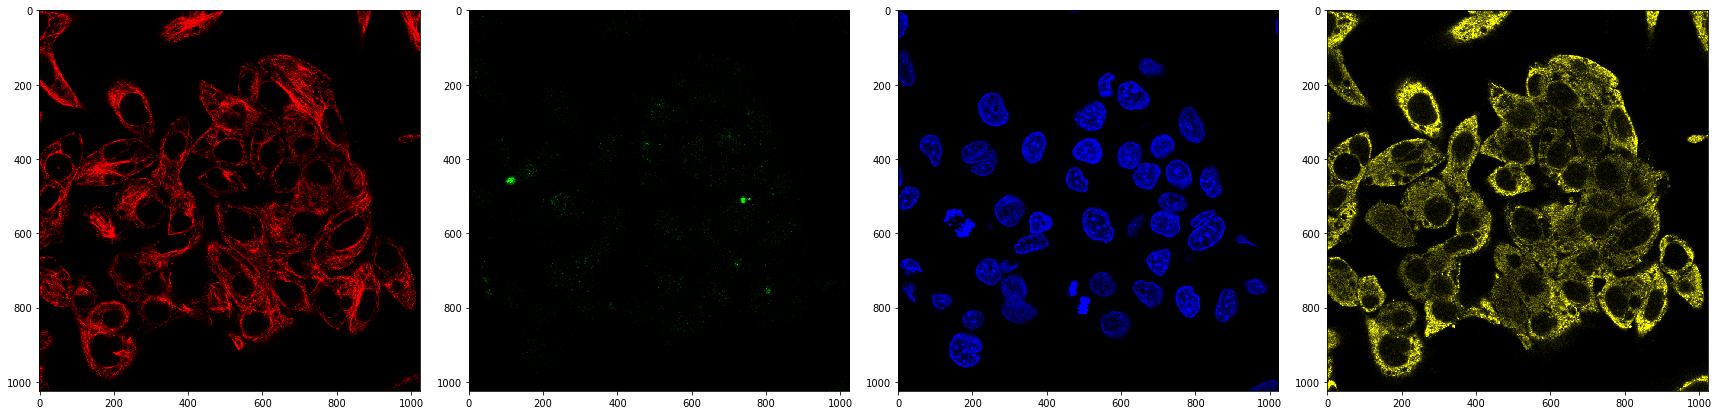

In [47]:
plot_rgby(channels)

In [56]:
makeImagePath(save_dir, imgids[0])

'../../data/test_combined/885deffa-bacb-11e8-b2b8-ac1f6b6435d0.npy'

In [63]:
makeComposites(root_dir, save_dir)